Data Source - 
https://datamarket.com/data/set/22wj/the-total-generation-of-electricity-by-the-us-electric-industry-monthly-data-for-the-period-jan-1985-oct-1996-for-recent-data-click-here#!ds=22wj&display=line

In [1]:
import pandas as pd
import numpy as np

df = pd.read_excel('the-total-generation-of-electric.xlsx', skiprows=12)

In [2]:
df.head()

,Month,Unnamed: 1,Unnamed: 2
0,1985-01-01,227.86,NaN
1,1985-02-01,198.24,NaN
2,1985-03-01,194.97,NaN
3,1985-04-01,184.88,NaN
4,1985-05-01,196.79,NaN


In [3]:
df = df.drop('Unnamed: 2', axis=1)
df.columns = ['ds', 'y']
df['ds'] = pd.DatetimeIndex(df.ds, freq='MS')
df.tail()

,ds,y
137,1996-06-01,268.79
138,1996-07-01,288.94
139,1996-08-01,290.16
140,1996-09-01,250.69
141,1996-10-01,240.80


In [4]:
df.y = np.log(df.y)
ts = df.copy()
ts_validate = df.copy()

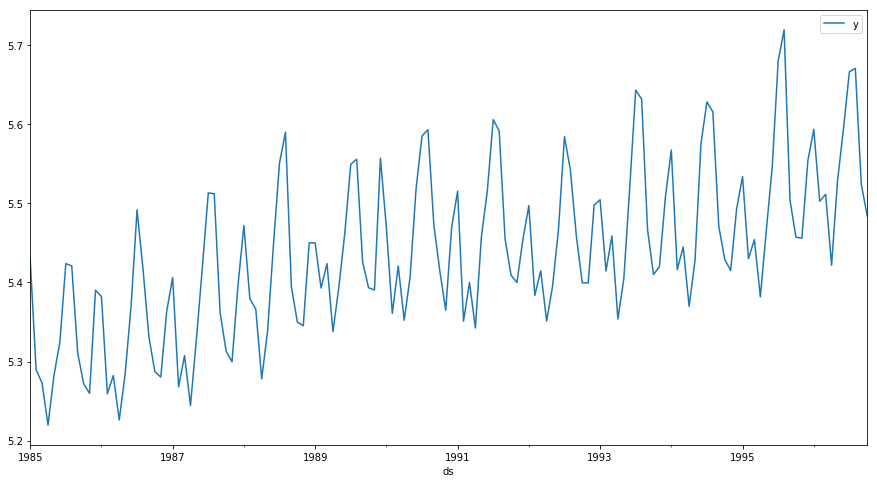

In [5]:
%matplotlib inline
ts.set_index('ds').plot(figsize=(15,8))

In [6]:
ts_train = ts[(ts.ds < '1996-01-01') & (ts.ds > '1991-01-01')]

In [7]:
import datetime
import matplotlib.pyplot as plt
from fbprophet import Prophet

model = Prophet()
model.fit(ts_train)

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [8]:
future = model.make_future_dataframe(periods=10, freq='MS')
forecast = model.predict(future)

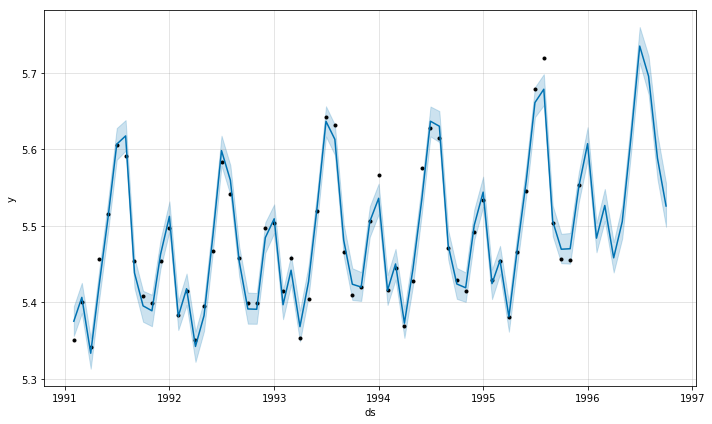

In [9]:
plot = model.plot(forecast)

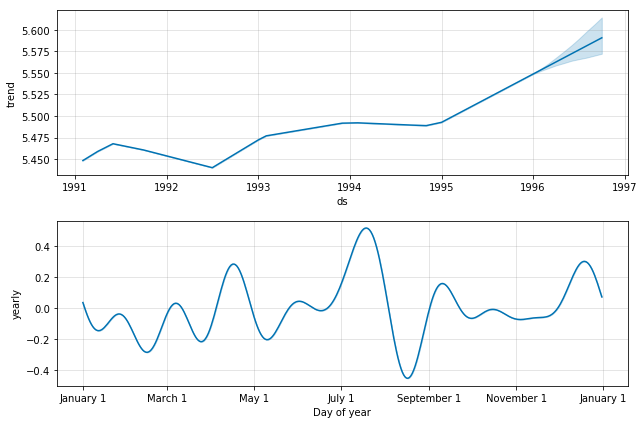

In [10]:
plot = model.plot_components(forecast)

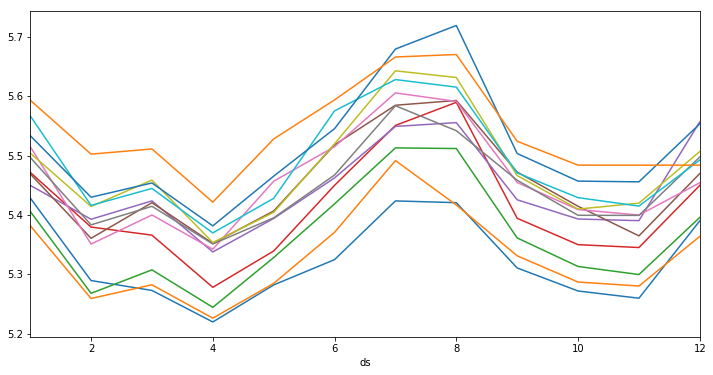

In [11]:
d1 = pd.DataFrame(ts, columns=['ds', 'y']).set_index('ds')
d1.index = [d1.index.month, d1.index.year]
d1 = d1.y.unstack().interpolate()
plot = d1.plot(legend=0, figsize=(12,6))

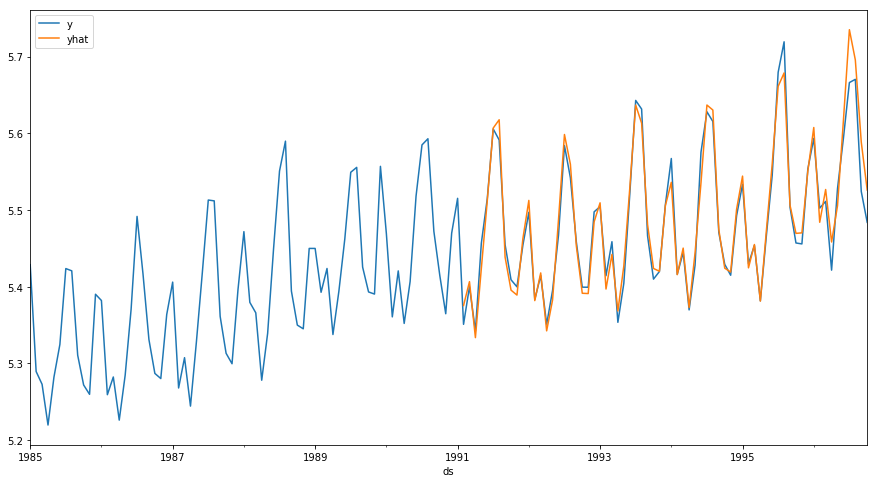

In [12]:
df_visualise = pd.merge(ts_validate, forecast, left_on='ds', right_on='ds', how='outer')
df_visualise = df_visualise.set_index('ds')
df_visualise[['y', 'yhat']].plot(figsize=(15,8))

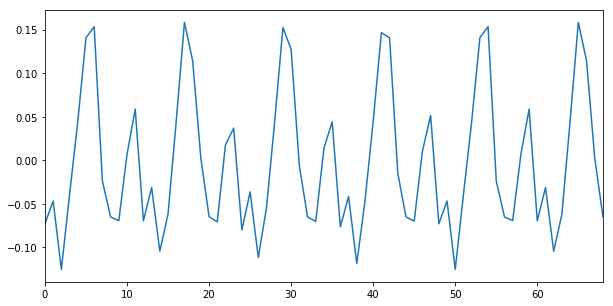

In [13]:
forecast[('yearly')].plot(figsize=(10,5))

In [14]:
forecast.columns

Index(['ds', 'trend', 'trend_lower', 'trend_upper', 'yhat_lower', 'yhat_upper',
       'seasonal', 'seasonal_lower', 'seasonal_upper', 'seasonalities',
       'seasonalities_lower', 'seasonalities_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'yhat'],
      dtype='object')